In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge, Lasso
from sklearn.metrics import r2_score

In [2]:
file_path = "/home/pravij07/Downloads/Auto.csv"
df = pd.read_csv(file_path)
print(df.head())

    mpg  cylinders  displacement  horsepower  weight  acceleration  year  \
0  18.0          8         307.0         130    3504          12.0    70   
1  15.0          8         350.0         165    3693          11.5    70   
2  18.0          8         318.0         150    3436          11.0    70   
3  16.0          8         304.0         150    3433          12.0    70   
4  17.0          8         302.0         140    3449          10.5    70   

   origin                       name  
0       1  chevrolet chevelle malibu  
1       1          buick skylark 320  
2       1         plymouth satellite  
3       1              amc rebel sst  
4       1                ford torino  


In [3]:
X = df.drop(columns=['mpg', 'name', 'origin'])
y = df['mpg']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
"""
4) Implementing Ridge and LASSO regression:
    We experiment with various alpha values.
    Ridge and LASSO regression apply regularization to reduce overfitting.
    A higher alpha value results in stronger regularizatio
"""

In [4]:
alphas = np.logspace(-3, 2, 50)  # Test alphas from 0.001 to 100
ridge_scores = []
lasso_scores = []

for alpha in alphas:
    ridge_model = Ridge(alpha=alpha)
    lasso_model = Lasso(alpha=alpha, max_iter=10000)

    ridge_model.fit(X_train_scaled, y_train)
    lasso_model.fit(X_train_scaled, y_train)

    ridge_r2 = ridge_model.score(X_test_scaled, y_test)
    lasso_r2 = lasso_model.score(X_test_scaled, y_test)

    ridge_scores.append(ridge_r2)
    lasso_scores.append(lasso_r2)
"""
5) Finding optimal alpha:
    We evaluate R² scores for different alpha values.
    The optimal alpha corresponds to the highest R² score on the test data.
"""


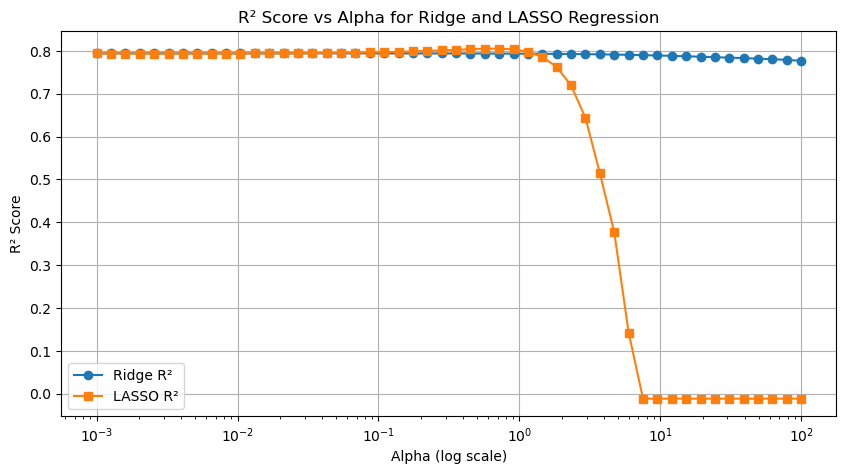

In [5]:
plt.figure(figsize=(10, 5))
plt.plot(alphas, ridge_scores, label="Ridge R²", marker="o")
plt.plot(alphas, lasso_scores, label="LASSO R²", marker="s")
plt.xscale("log")
plt.xlabel("Alpha (log scale)")
plt.ylabel("R² Score")
plt.title("R² Score vs Alpha for Ridge and LASSO Regression")
plt.legend()
plt.grid()
plt.show()

In [6]:
best_ridge_alpha = alphas[np.argmax(ridge_scores)]
best_lasso_alpha = alphas[np.argmax(lasso_scores)]

best_ridge_score = max(ridge_scores)
best_lasso_score = max(lasso_scores)
"""
7) Optimal Alpha Values:
    Best Ridge Alpha: {best_ridge_alpha:.4f}, R²: {best_ridge_score:.4f}
    Best LASSO Alpha: {best_lasso_alpha:.4f}, R²: {best_lasso_score:.4f}
    Ridge regression usually performs better when features are highly correlated (multicollinearity).
    LASSO can shrink some coefficients to zero, helping with feature selection.
"""

In [7]:
print(f"Best Ridge Alpha: {best_ridge_alpha:.4f}, R²: {best_ridge_score:.4f}")
print(f"Best LASSO Alpha: {best_lasso_alpha:.4f}, R²: {best_lasso_score:.4f}")

Best Ridge Alpha: 0.0010, R²: 0.7942
Best LASSO Alpha: 0.7197, R²: 0.8053
